In [1]:
import numpy as np
import pandas as pd
from scipy.stats import multivariate_normal as mvn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
%matplotlib inline
sns.set()

## Mnist: Digits Training and Testing Dataset

In [2]:
mnist_train = pd.read_csv('mnist_train.csv') # load training mnist
mnist_train = mnist_train.drop(['index','Unnamed: 0'], axis=1) # drop useless columns
mnist_train = mnist_train.sort_values(by=['labels'], ignore_index=True) # rearrange data by their labels
print(len(mnist_train))
mnist_train.head() # show data

60000


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,labels
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
mnist_test = pd.read_csv('mnist_test.csv') # load testing mnist
mnist_test = mnist_test.drop(['index','Unnamed: 0'], axis=1) # drop useless columns
mnist_test = mnist_test.sort_values(by=['labels'], ignore_index=True) # rearrange data by their labels
print(len(mnist_test))
mnist_test.head() # show data

10000


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,labels
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Load DataFrame Function

In [4]:
def getXy(DF):
    X, y = DF.to_numpy()[:,:-1], DF.to_numpy()[:,-1]
    return X, y

## Prepare Load Testing Dataset

In [5]:
x_test, y_test = getXy(mnist_test)

## Digits Data From Mnist

Text(0.5, 0.98, 'Samples (image size=28x28)')

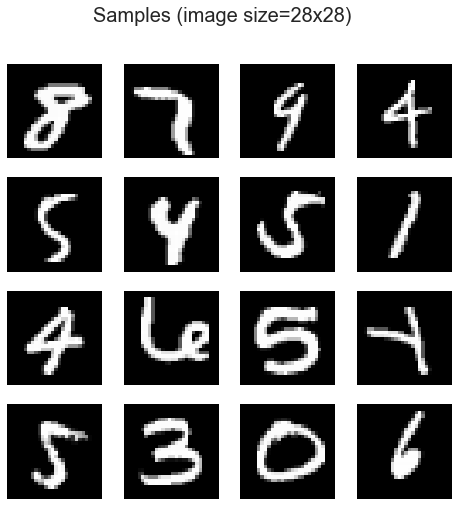

In [6]:
ids = np.random.randint(0, 60000, 16)
plt.figure(figsize=(8,8))
for i in range(ids.shape[0]):
    plt.subplot(4,4,i+1)
    plt.imshow(mnist_train.iloc[ids[i]].values[:-1].reshape(28,28), 'gray')
    plt.axis('off')
plt.suptitle('Samples (image size=28x28)', fontsize=20)

## Data Distribution

Text(0.5, 1.0, 'Data Distribution')

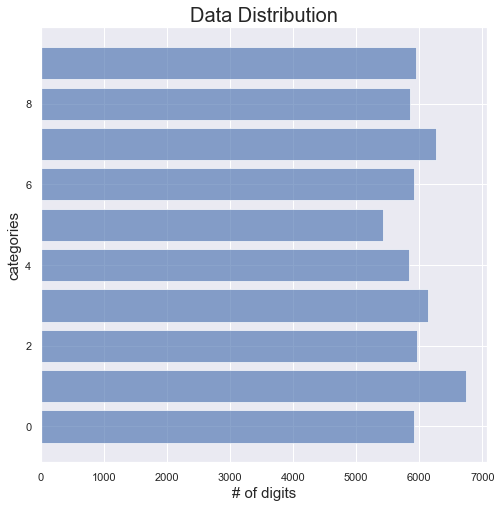

In [7]:
y = mnist_train.to_numpy()[:,-1]
plt.figure(figsize=(8,8))
plt.hist(y, bins=10, alpha=0.65, rwidth=0.8,\
         align='left', orientation='horizontal',
         range=(0, 10))
plt.xlabel('# of digits', fontsize=15)
plt.ylabel('categories', fontsize=15)
plt.title('Data Distribution', fontsize=20)

## Means

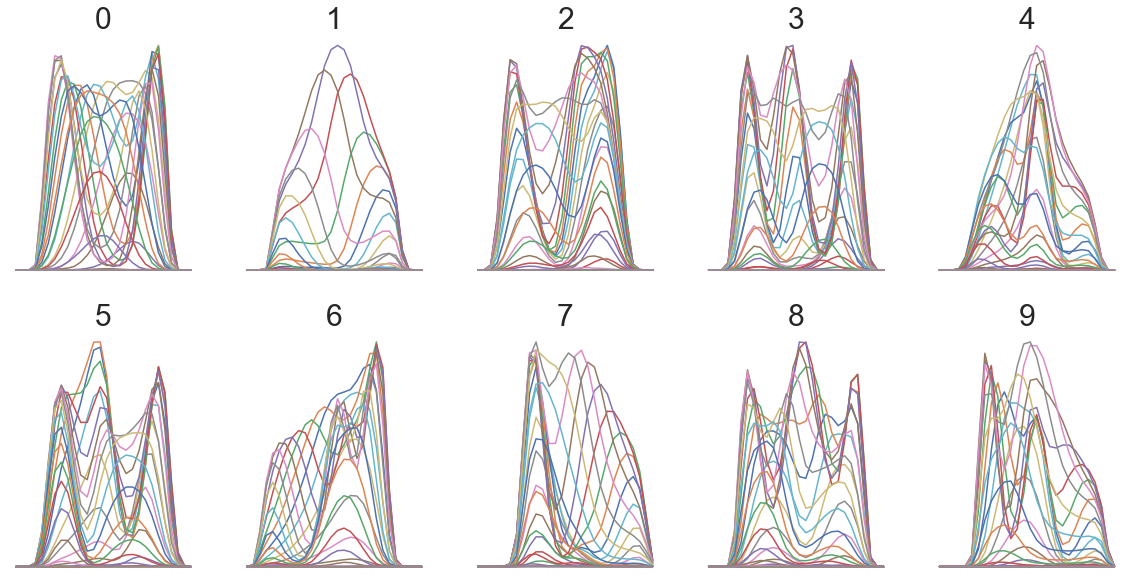

In [8]:
X,y = getXy(mnist_train)
u = np.zeros((10, 784))
plt.figure(figsize=(20,10))
for i in range(10):
    u[i] = np.mean(X[y==i], 0)
    plt.subplot(2,5,i+1)
    plt.plot(u[i].reshape(28, 28))
    plt.axis('off')
    plt.title(str(i), fontsize=30)

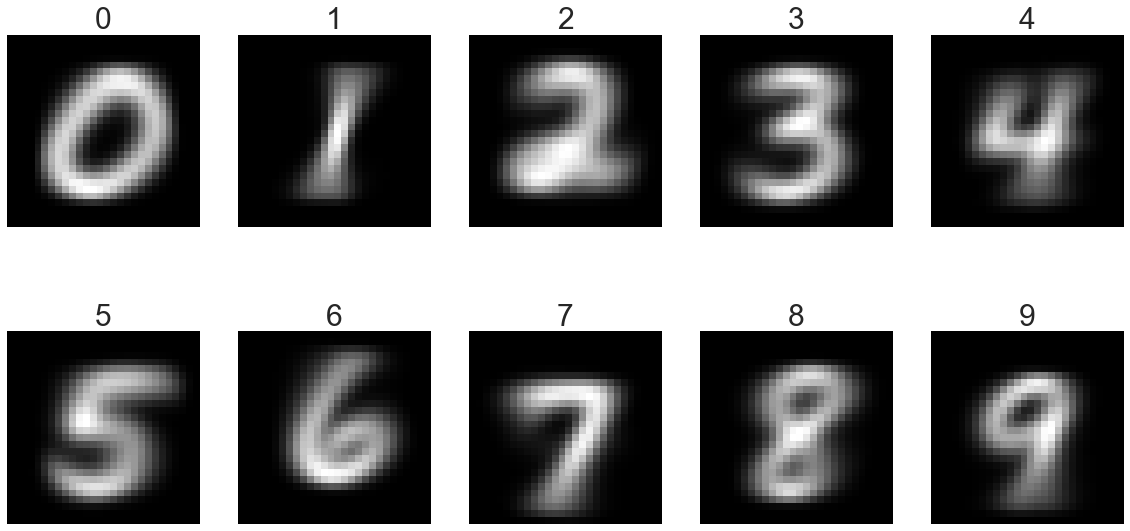

In [9]:
plt.figure(figsize=(20,10))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(u[i].reshape(28, 28), 'gray')
    plt.axis('off')
    plt.title(str(i), fontsize=30)

## Variances

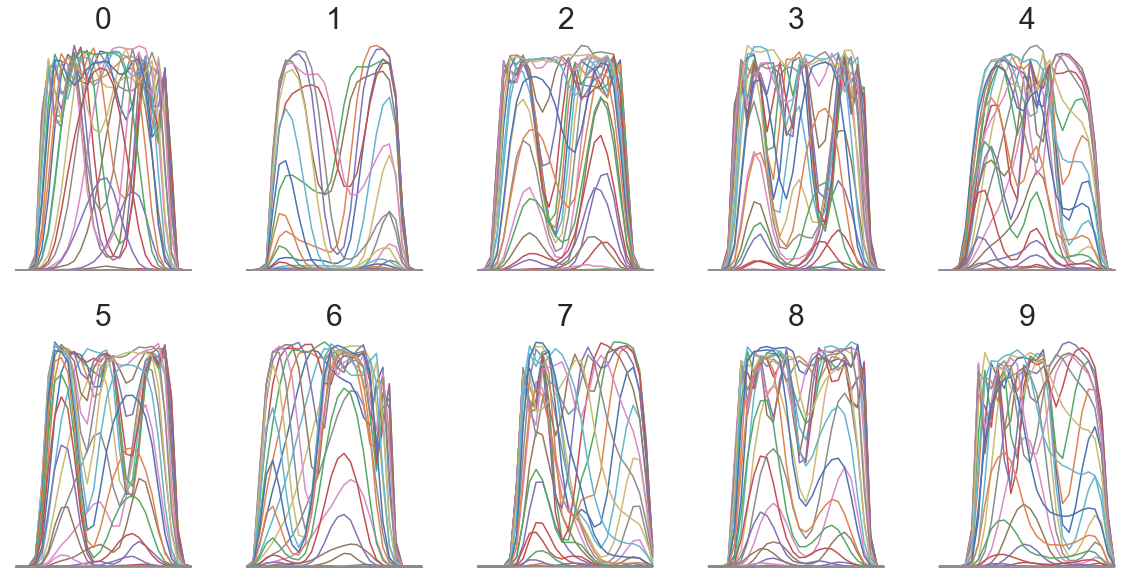

In [10]:
var = np.zeros((10, 784))
plt.figure(figsize=(20,10))
for i in range(10):
    var[i] = X[y==i].var(axis=0)
    plt.subplot(2,5,i+1)
    plt.plot(var[i].reshape(28,28))
    plt.axis('off')
    plt.title(str(i), fontsize=30)

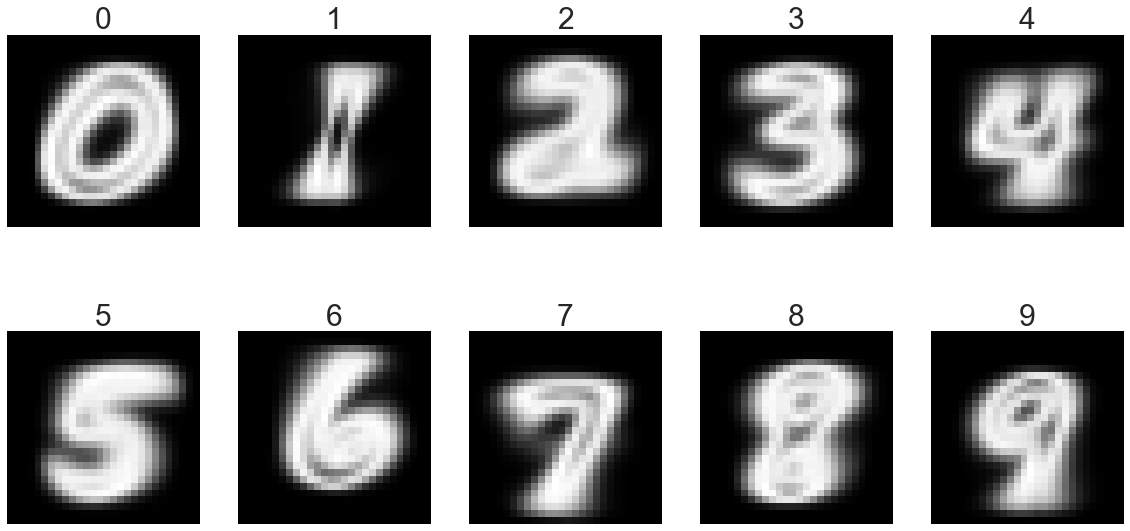

In [11]:
plt.figure(figsize=(20,10))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(var[i].reshape(28, 28), 'gray')
    plt.axis('off')
    plt.title(str(i), fontsize=30)

## Covariances

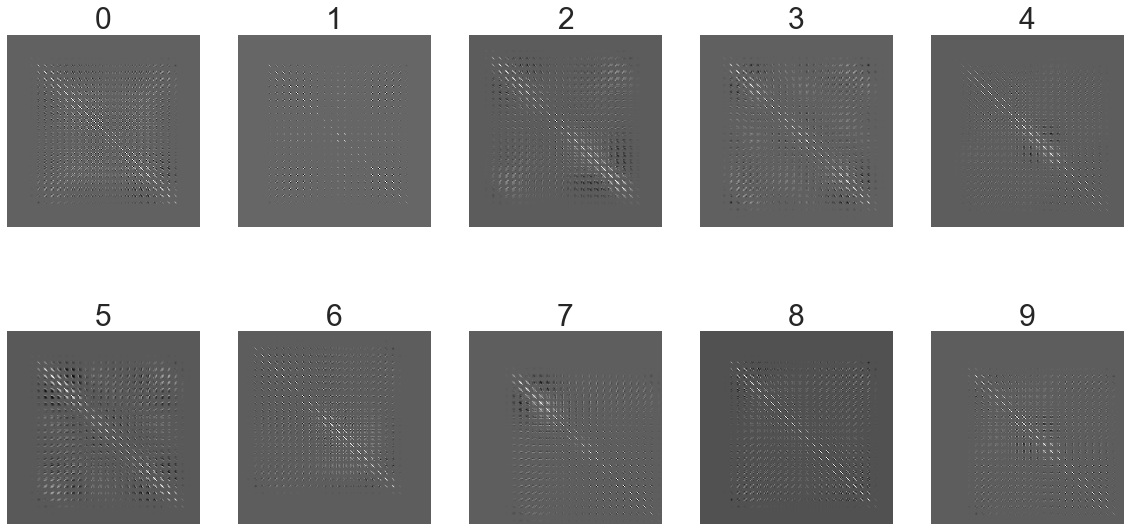

In [12]:
cov = np.zeros((10, 784, 784))
plt.figure(figsize=(20,10))
for i in range(10):
    c = X[y==i]-u[i]
    d = np.matmul(c.T, c)
    cov[i] = d
    plt.subplot(2,5,i+1)
    plt.imshow(cov[i], 'gray')
    plt.axis('off')
    plt.title(str(i), fontsize=30)

## Accuracy Function

In [6]:
def accuracy(targets, predictions):
    return np.mean(targets == predictions)

In [7]:
def print3accs(model, x_train, x_validation, x_test,\
               y_train, y_validation, y_test):
    pred = model.predict(x_train)
    print('training dataset accuracy: {:.3f}'.format(accuracy(pred, y_train)))
    pred = model.predict(x_validation)
    print('validation dataset accuracy: {:.3f}'.format(accuracy(pred, y_validation)))
    pred = model.predict(x_test)
    print('testing dataset accuracy: {:.3f}'.format(accuracy(pred, y_test)))

### Equation
<br>
Based on the model you choose the likelihood function will change.
<br>
The prior remains the same.
<br>
The evidents is a constant which we can change it to 1.
<br>
We want to maximize the likelihood.
<br>
<br>
<br>
$
\begin{align}
posterior = \frac{likelihood*prior}{evidents} \\
\\
p(y|X) = \frac{p(X|y)p(y)}{p(X)}
\end{align}
$

## Gaussian Naive Bayesian Classifier (means and variances)

In [15]:
class GaussNB():
    ''' Description
    This is a supervised learning algorithm, Gaussian Naive Bayes.
    In fit function:
        The model learns the  knowledge(MEANS and VARIANCES)
            from the dataset, and uses the knowledge to predict new data.
        EACH data sample contains:
            an input and a label, where the input is
            a set of features, such as [x1,x2,...xi...],
            let's say there are 1000 features for each sample.
        For EACH category:
            the model learns A, B, and Prior
            where A is the mean features which has the
            same length as a sample, 1000.
            where B is the variance features which also 
            has the same length as a sample, 1000.
            The Prior = (# of samples in this category)/(entire dataset)
        Thus, K categories, K As, K Bs, and K Priors.
        The model uses As, Bs, and Priors to predict new samples.
    In predict funcion:
        mvn stands for multivariate normal/Gaussian.
        Let's say we have 800 new samples.
        For EACH category:
            the mvn generates 800 probabilities/scores.
        Thus, we get 800 by K probabilities, where K is
            the number of the categories.
        For each row:
            we find the index of the max probability,
            so the category we want to assign to the sample
            is that index.
    '''
    def fit(self, X, y, epsilon=1e-3):
        self.likelihoods = dict()
        self.priors = dict()
        self.K = set(y.astype(int))
        for k in self.K:
            X_k = X[y==k,:]
            self.likelihoods[k] = {'means': X_k.mean(axis=0),\
                                   'cov': X_k.var(axis=0)+epsilon}
            self.priors[k] = len(X_k)/len(X)
            
    def predict(self, X, return_prob=False):
        N, D = X.shape
        P_hat = np.zeros((N, len(self.K)))
        for k, l in self.likelihoods.items():
            P_hat[:,k] = mvn.logpdf(X, l['means'], l['cov']) + np.log(self.priors[k])
        if return_prob:
            P_hat
        else:
            return np.argmax(P_hat, axis=1).astype(int)
    
    def get_confusion(self, X, y):
        n = len(self.K)
        confusion_matrix = np.zeros((n,n))
        for k in range(n):
            y_hat = self.predict(X[y==k])
            for j in range(n):
                confusion_matrix[k,j] = sum(y_hat==j)
            confusion_matrix[k] = confusion_matrix[k]/sum(confusion_matrix[k])
        return np.round(confusion_matrix,2)

In [16]:
X,y = getXy(mnist_train)
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=80)
gnb = GaussNB()
gnb.fit(x_train, y_train, epsilon=1000)

In [17]:
print3accs(gnb, x_train, x_val, x_test, y_train, y_val, y_test)

training dataset accuracy: 0.804
validation dataset accuracy: 0.804
testing dataset accuracy: 0.817


In [18]:
cm = gnb.get_confusion(x_test, y_test)

Text(0.5, 1, 'Testing Dataset Result')

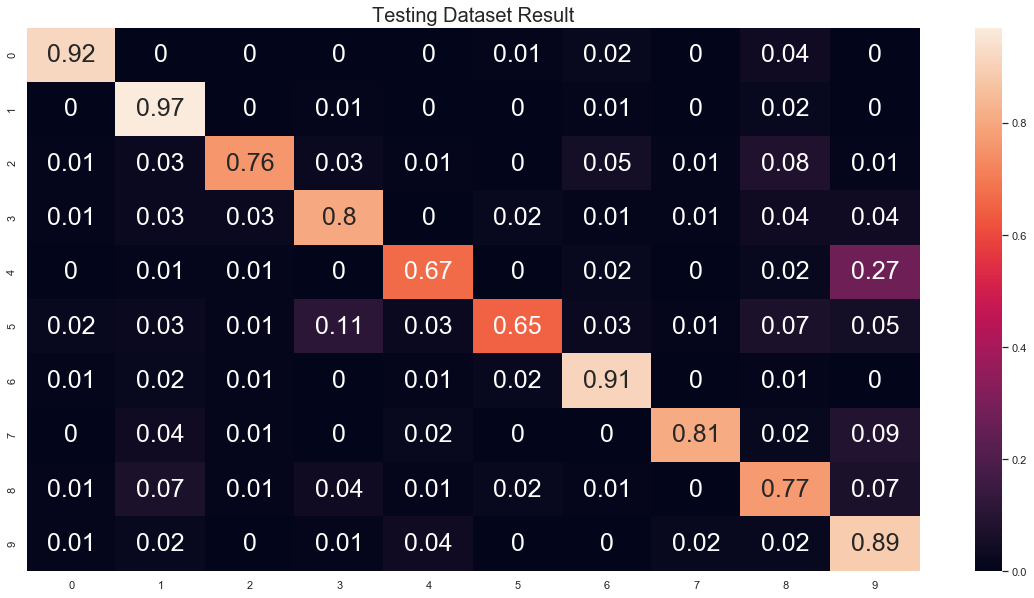

In [19]:
plt.figure(figsize=(20, 10))
sns.heatmap(cm, annot=True, annot_kws={'fontsize':25})
plt.title('Testing Dataset Result', fontsize=20)

## Gaussian Naive Bayesian Classifier (means and covariance matrixes)

In [8]:
class GenGaussNB():
    ''' Description
    This is a supervised learning algorithm, Gaussian Naive Bayes.
    In fit function:
        The model learns the  knowledge(MEANS and COVARIANCE MATRIXES)
            from the dataset, and uses the knowledge to predict new data.
        EACH data sample contains:
            an input and a label, where the input is
            a set of features, such as [x1,x2,...xi...],
            let's say there are 1000 features for each sample.
        For EACH category:
            the model learns A, B, and Prior
            where A is the mean features which has the
            same length as a sample, 1000.
            where B is covariance matrix, 1000x1000.
            The Prior = (# of samples in this category)/(entire dataset)
        Thus, K categories, K As, K Bs, and K Priors.
        The model uses As, Bs, and Priors to predict new samples.
    In predict funcion:
        mvn stands for multivariate normal/Gaussian.
        Let's say we have 800 new samples.
        For EACH category:
            the mvn generates 800 probabilities/scores.
        Thus, we get 800 by K probabilities, where K is
            the number of the categories.
        For each row:
            we find the index of the max probability,
            so the category we want to assign to the sample
            is that index.
    '''
    def fit(self, X, y, epsilon=0.1):
        self.likelihoods = dict()
        self.priors = dict()
        self.K = set(y.astype(int))
        for k in self.K:
            X_k = X[y==k,:]
            self.likelihoods[k] = {'means': X_k.mean(axis=0)} # calculate mean
            # calculate covariance matrix
            g = X_k-self.likelihoods[k]['means']
            self.likelihoods[k]['cov'] = (1/(len(X_k)-1))*np.matmul(g.T,g)+epsilon*np.eye(X_k.shape[1]) 
            self.priors[k] = len(X_k)/len(X)
    
    def predict(self, X, return_prob=False):
        N, D = X.shape
        P_hat = np.zeros((N, len(self.K)))
        for k, l in self.likelihoods.items():
            P_hat[:,k] = mvn.logpdf(X, l['means'], l['cov']) + np.log(self.priors[k])
        if return_prob:
            return P_hat
        else:
            return np.argmax(P_hat, axis=1).astype(int)
    
    def get_confusion(self, X, y):
        n = len(self.K)
        conf_matrix = np.zeros((n,n))
        for i in range(n):
            y_hat = self.predict(X[y==i])
            for j in range(n):
                conf_matrix[i,j] = sum(y_hat==j)
            conf_matrix[i] = conf_matrix[i]/sum(conf_matrix[i])
        return np.round(conf_matrix,2)

In [9]:
X,y = getXy(mnist_train)
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=140)
ggnb = GenGaussNB()
ggnb.fit(x_train, y_train, epsilon=1175)

In [10]:
print3accs(ggnb, x_train, x_val, x_test, y_train, y_val, y_test)

training dataset accuracy: 0.959
validation dataset accuracy: 0.953
testing dataset accuracy: 0.954


In [11]:
cm = ggnb.get_confusion(x_test, y_test)

Text(0.5, 1, 'Testing Dataset Result')

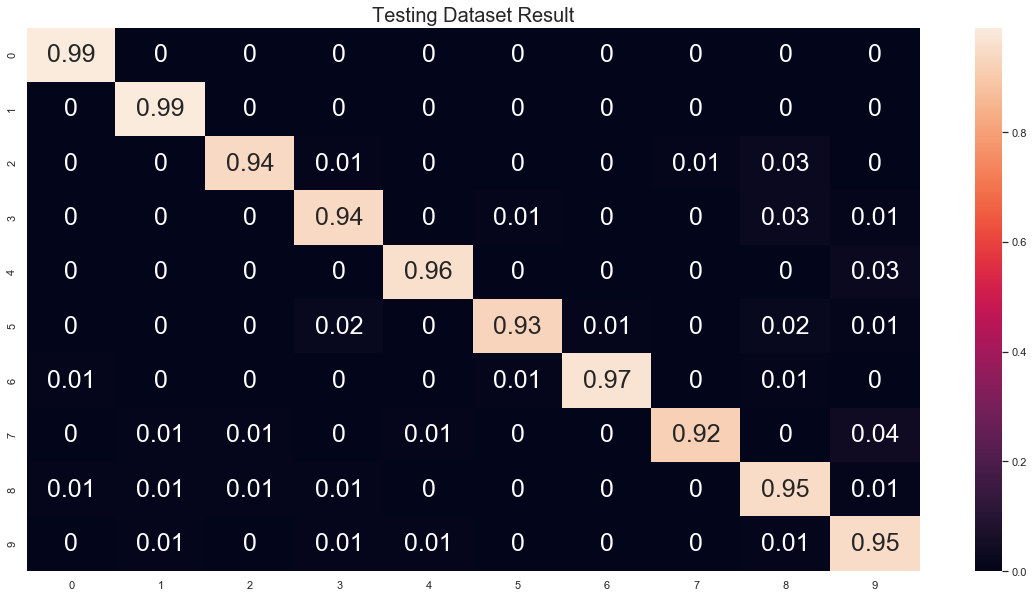

In [12]:
plt.figure(figsize=(20, 10))
sns.heatmap(cm, annot=True, annot_kws={'fontsize':25})
plt.title('Testing Dataset Result', fontsize=20)

## Analyze Misclassified Data

In [13]:
def findMisclassifyData(model, X, misclassify):
    # X must only belong to a single category
    # find misclassified data by category
    pred = model.predict(X)
    index = np.where(pred == misclassify)
    images = X[index]
    return images

In [47]:
c = 2
mis = 7
imgs = findMisclassifyData(ggnb, X[y == c], misclassify=mis)
imgs.shape

(25, 784)

Text(0.5, 0.98, 'Classify 2 as 7')

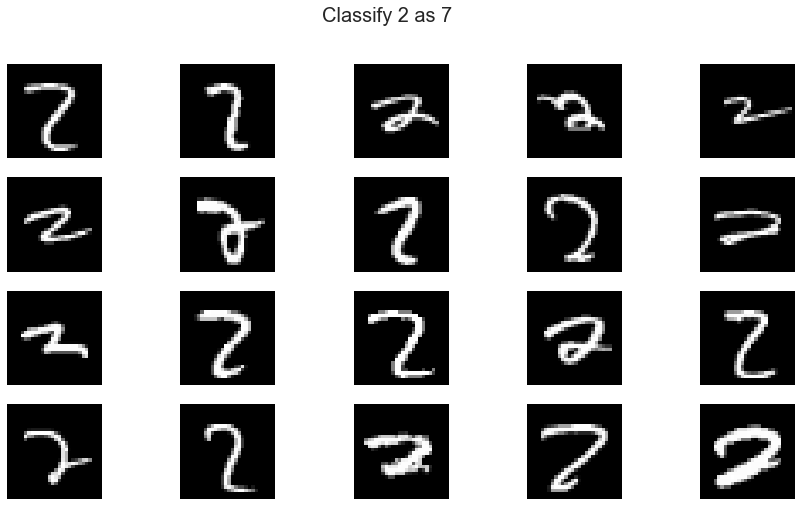

In [48]:
ids = np.arange(20)
plt.figure(figsize=(15,8))
for i in ids:
    plt.subplot(4,5,i+1)
    plt.imshow(imgs[i].reshape(28,28), 'gray')
    plt.axis('off')
#     plt.title(str(i))
plt.suptitle('Classify {} as {}'.format(c, mis), fontsize=20)

## Binomial Naive Bayesian Classifier (frequencies of 1s & 0s)

In [25]:
class BinomialNB():
    ''' Description
    This is a supervised learning algorithm, Binomial Naive Bayes.
    In fit function:
        The model learns the  knowledge(the FREQUENCIES OF 1 and 0)
            from the dataset, and uses the knowledge to predict new data.
        EACH data sample contains:
            an input and a label, where the input is
            a set of features(1s or 0s), such as [x1,x2,...xi...],
            let's say there are 1000 features for each sample.
        For EACH category:
            the model learns A and Prior
            where A is (the frequencies of 1)/(the frequencies of 0).
            Then A = (A+epsilon)/sum(A+epsilon), where the numerator
            is a vector with size 1000, and denominator is a number.
            A has the same size as a sample, 1000.
            The Prior = (# of samples in this category)/(entire dataset)
        Thus, K categories, K As and K Priors.
        The model uses As and Priors to predict new samples.
    In predict funcion:
        posterior = p(1-p)prior
        Let's say we have 800 new samples.
        For EACH category:
            the model generates 800 probabilities/scores.
        Thus, we get 800 by K probabilities, where K is
            the number of the categories.
        For each row:
            we find the index of the max probability,
            so the category we want to assign to the sample
            is that index.
    '''    
    def fit(self, X, y, epsilon=1):
        self.priors = dict()
        self.likelihoods = dict()
        self.K = set(y.astype(int))
        for k in self.K:
            X_k = X[y == k]
            self.priors[k] = len(X_k)/len(X)
            self.likelihoods[k] = (np.count_nonzero(X_k, 0)+epsilon)/sum(np.count_nonzero(X_k, 0)+epsilon)
    
    def predict(self, X):
        N, D = X.shape
        P_hat = np.zeros((N, len(self.K)))
        for k, l in self.likelihoods.items():
            P_hat[:,k] = np.sum(X*np.log(l),1)+np.sum((1-X)*np.log(1-l),1)+np.log(self.priors[k])
        return np.argmax(P_hat, 1).astype(int)
    
    def get_confusion(self, X, y):
        n = len(self.K)
        conf_matrix = np.zeros((n,n))
        for i in range(n):
            y_hat = self.predict(X[y==i])
            for j in range(n):
                conf_matrix[i,j] = sum(y_hat==j)
            conf_matrix[i] = conf_matrix[i]/sum(conf_matrix[i])
        return np.round(conf_matrix, 2)

In [26]:
X, y = getXy(mnist_train)
I = X.copy()
T = y.copy()
I[I<127] = 0
I[I>=127] = 1

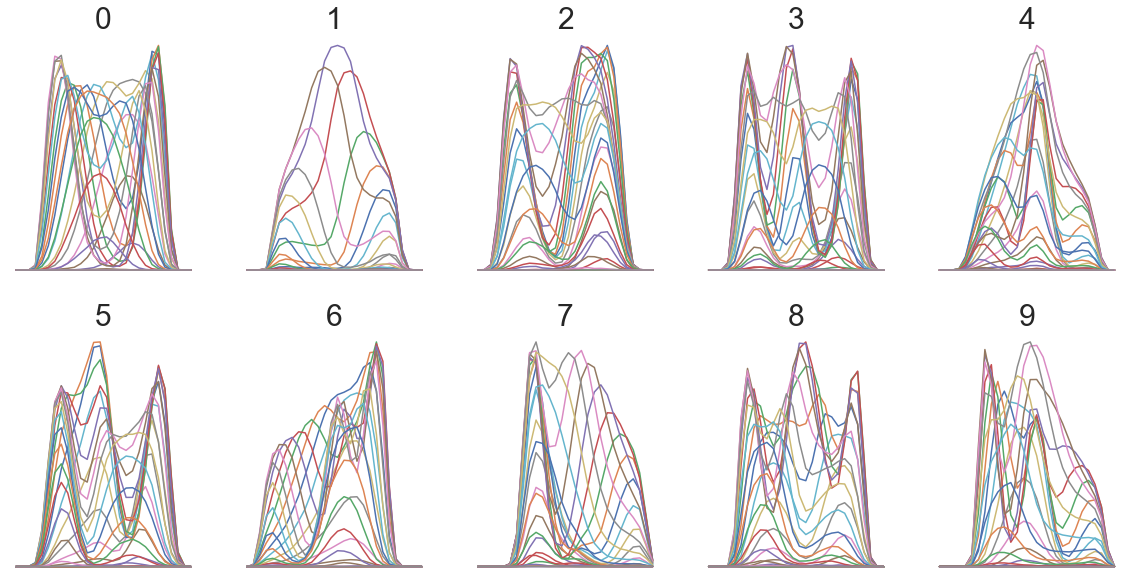

In [27]:
u = np.zeros((10, 784))
plt.figure(figsize=(20,10))
for i in range(10):
    u[i] = np.mean(I[y==i], 0)
    plt.subplot(2,5,i+1)
    plt.plot(u[i].reshape(28, 28))
    plt.axis('off')
    plt.title(str(i), fontsize=30)

In [28]:
x_train, x_val, y_train, y_val = train_test_split(I, T, test_size=0.3, random_state=0)
bnb = BinomialNB()
bnb.fit(x_train, y_train, epsilon=1e-3)

In [29]:
print3accs(bnb, x_train, x_val, x_test, y_train, y_val, y_test)

training dataset accuracy: 0.827
validation dataset accuracy: 0.827
testing dataset accuracy: 0.840


In [30]:
cm = bnb.get_confusion(x_test, y_test)

Text(0.5, 1, 'Testing Dataset Result')

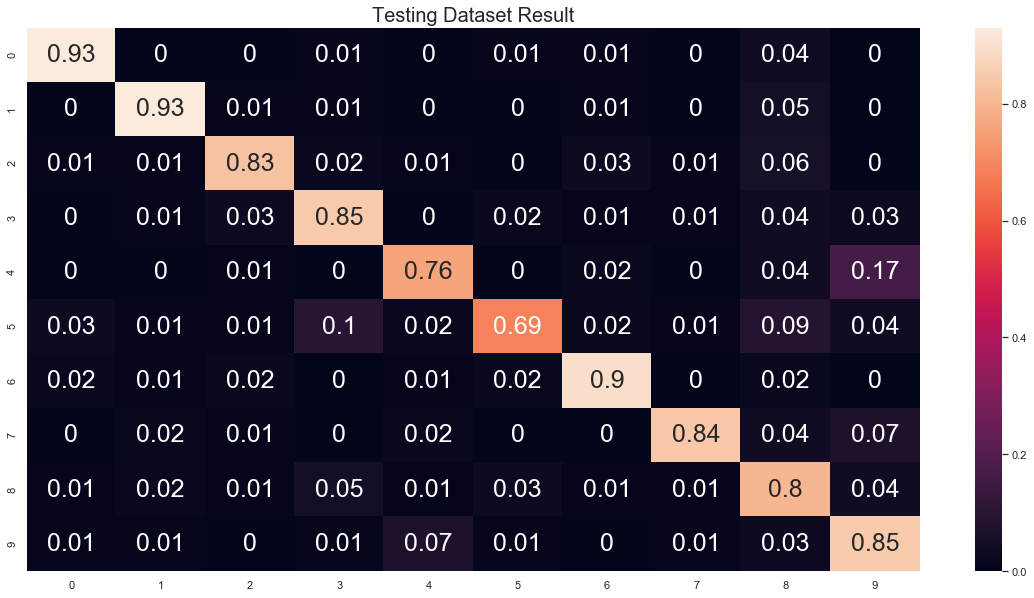

In [31]:
plt.figure(figsize=(20, 10))
sns.heatmap(cm, annot=True, annot_kws={'fontsize':25})
plt.title('Testing Dataset Result', fontsize=20)

# OPTIMIZATION STATIONS
<br>
By splitting the training dataset in different ways, get the best model.
<br>
We split the training dataset into 70% training and 30% validation.

In [ ]:
def optimizeModel(model, epsilon, train_DF=mnist_train,\
                  test_DF=mnist_test, Binomial=False):
    acc_dict = {'trn_acc':[], 'val_acc':[], 'test_acc':[]}
    X, y = getXy(train_DF)
    X_test, y_test = getXy(test_DF)
    if Binomial:
        I = X.copy(); I[I<127] = 0; I[I>=127] = 1
        x_test = X_test.copy()
        x_test[x_test<127] = 0; x_test[x_test>=127] = 1
    else:
        I = X.copy()
        x_test = X_test.copy()
    step = 20
    rs_ind = np.arange(0,200,step) # random state index
    for i in rs_ind:
        x_train, x_validation, y_train, y_validation = train_test_split(I, y, test_size=0.3, random_state=i)
        model.fit(x_train, y_train, epsilon=epsilon)
        # predict 3 datasets
        train_pred = model.predict(x_train)
        validation_pred = model.predict(x_validation)
        test_pred = model.predict(x_test)
        # measure 3 accs
        train_acc = accuracy(train_pred, y_train)
        validation_acc = accuracy(validation_pred, y_validation), 
        test_acc = accuracy(test_pred, y_test)
        # save
        acc_dict['trn_acc'].append(round(train_acc,3))
        acc_dict['val_acc'].append(round(validation_acc[0],3))
        acc_dict['test_acc'].append(round(test_acc,3))
        print('{:.0f}% done...'.format((i+step)/2))
    # save 3 accs into DF
    acc_df = pd.DataFrame()
    acc_df['random_state'] = rs_ind
    acc_df['trn_acc'] = acc_dict['trn_acc']
    acc_df['val_acc'] = acc_dict['val_acc']
    acc_df['test_acc'] = acc_dict['test_acc']
    return acc_df

## Gaussian (means and variances) Optimization Station

In [ ]:
gnb = GaussNB()
gnb_df = optimizeModel(gnb, 1175)

In [ ]:
np.argmax(gnb_df.to_numpy()[:,1]), np.argmax(gnb_df.to_numpy()[:,2]), np.argmax(gnb_df.to_numpy()[:,3])

In [ ]:
gnb_df

In [ ]:
plt.figure(figsize=(10,5))
plt.xlabel('training accuracy', fontsize=15)
plt.ylabel('validation accuracy', fontsize=15)
for i in range(20):
    x = gnb_df['trn_acc'][i]
    y = gnb_df['val_acc'][i]
    plt.plot(x, y, 'o', color='blue')
    plt.text(x-0.00001, y-0.00001, s=str(i), fontsize=20,\
             horizontalalignment='right')
plt.title('Find the Best Model', fontsize=20)

## Gaussian (means and covariances) Optimization Station

In [ ]:
ggnb = GenGaussNB()
ggnb_df = optimizeModel(ggnb, 1175)

In [ ]:
np.argmax(ggnb_df.to_numpy()[:,1]), np.argmax(ggnb_df.to_numpy()[:,2]), np.argmax(ggnb_df.to_numpy()[:,3])

In [ ]:
ggnb_df

In [ ]:
plt.figure(figsize=(10,5))
plt.xlabel('training accuracy', fontsize=15)
plt.ylabel('validation accuracy', fontsize=15)
for i in range(20):
    x = ggnb_df['trn_acc'][i]
    y = ggnb_df['val_acc'][i]
    plt.plot(x, y, 'o', color='blue')
    plt.text(x-0.00001, y-0.00001, s=str(i), fontsize=20,\
             horizontalalignment='right')
plt.title('Find the Best Model', fontsize=20)

## Binomial Optimization Station

In [ ]:
bnb = BinomialNB()
bnb_df = optimizeModel(bnb, 2e-3, Binomial=True)

In [ ]:
np.argmax(bnb_df.to_numpy()[:,1]), np.argmax(bnb_df.to_numpy()[:,2]), np.argmax(bnb_df.to_numpy()[:,3])

In [ ]:
bnb_df

In [ ]:
plt.figure(figsize=(10,5))
plt.xlabel('training accuracy', fontsize=15)
plt.ylabel('validation accuracy', fontsize=15)
for i in range(10):
    x = bnb_df['trn_acc'][i]
    y = bnb_df['val_acc'][i]
    plt.plot(x, y, 'o', color='blue')
    plt.text(x-0.00001, y-0.00001, s=str(i), fontsize=20,\
             horizontalalignment='right')
plt.title('Find the Best Model', fontsize=20)